# THE SPARKS FOUNDATION 


### Data Science And Bussiness Analytics(Task- 2)

### Author : Shivam Kumar

### Exploratory Data Analysis - Retail

 - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
 - As a business manager try to find ou the weak areas where you can work to make more profit.
 - Dataset: https://bit.ly/3i4rbWl

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df =pd.read_csv('C:\\Users\\Shivam\\OneDrive\\Desktop\\Python\\SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
pd.DataFrame(df.shape,index=['Row','Column'],columns=[1])

,1
Row,9994
Column,13


 - There are 1339 Rows and 13 Columns present in this Dataset.

### Checking Duplicate value

In [6]:
df.duplicated().sum()

17

 - There are 17 Duplicate value present in this Dataset.

In [7]:
#Droping the Duplicate Value
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.duplicated().sum()

0

 ## Statistics Summary of Dataset

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [10]:
df.nunique().to_frame()

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


## Columns And Their Data Types

In [11]:
df.dtypes.to_frame('Data type') 

,Data type
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


## Checking Missing Values

In [12]:
df.isnull().sum().to_frame('Missing_Count')

,Missing_Count
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


 - There are no missing values in the Dataset.

## Seperating Categorical and Numerical Columns

In [13]:
df_cat=df.select_dtypes(include='object').columns
df_num=df.select_dtypes(exclude='object').columns

In [14]:
df_cat

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [15]:
df_num

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

 - There are 8 Categorical and 5 numerical Columns  in the Dataset.

## Exploratory Data Analysis 

### Categorical Analysis

In [16]:
df_cat

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

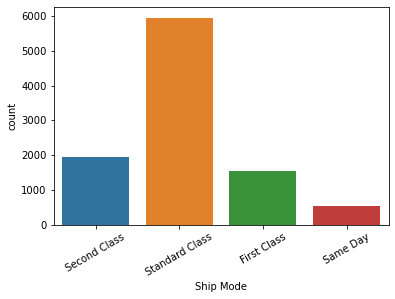

In [17]:
sns.countplot(df['Ship Mode'])
plt.xticks(rotation=30)
plt.show()

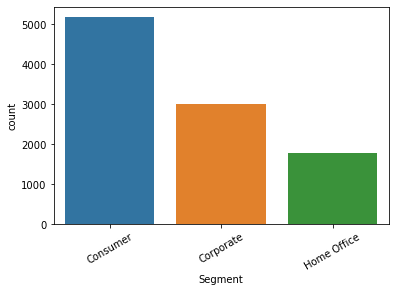

In [18]:
sns.countplot(df['Segment'])
plt.xticks(rotation=30)
plt.show()

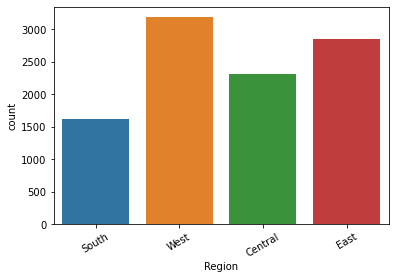

In [19]:
sns.countplot(df['Region'])
plt.xticks(rotation=30)
plt.show()

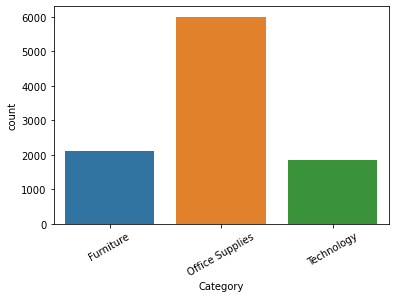

In [20]:
sns.countplot(df['Category'])
plt.xticks(rotation=30)
plt.show()

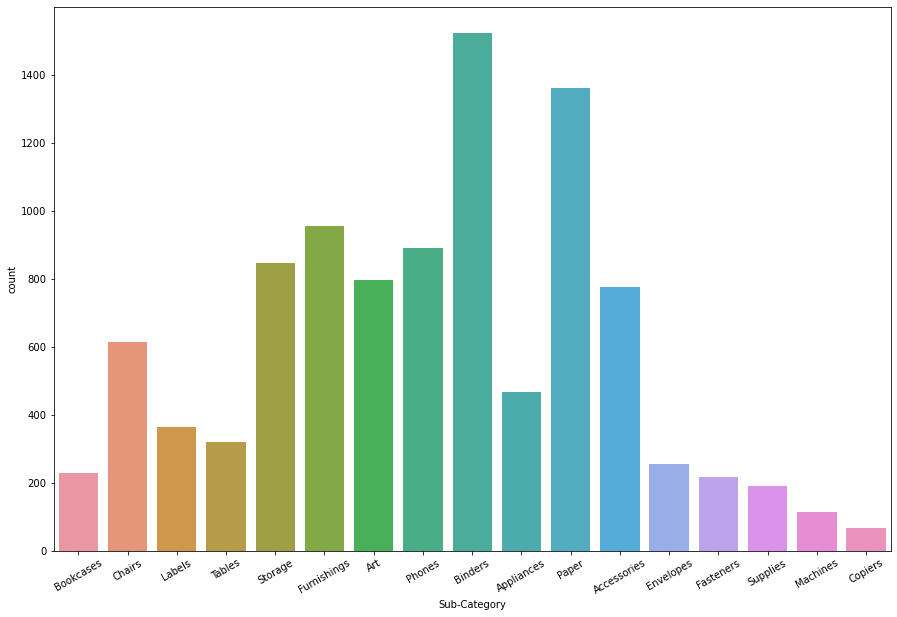

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=30)
plt.show()

### Numerical Analysis

In [22]:
df_num

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [23]:
# Dropping irrelevant features - Postal Code 

df.drop(columns="Postal Code",inplace=True)

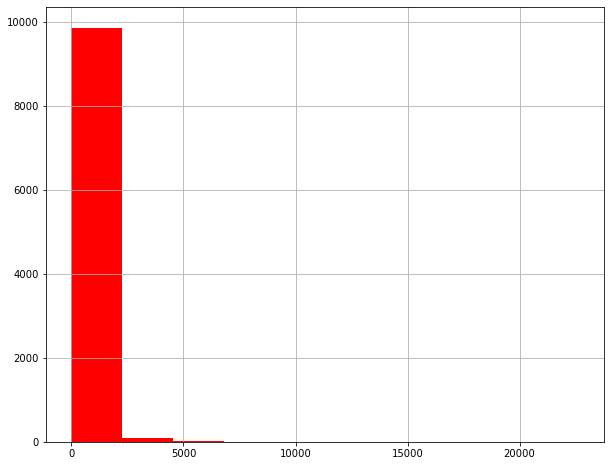

In [24]:
plt.figure(figsize=(10,8))
df['Sales'].hist(color='r')
plt.show()

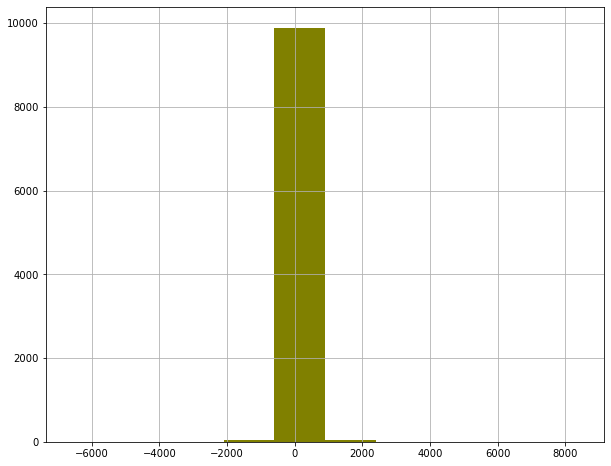

In [25]:
plt.figure(figsize=(10,8))
df['Profit'].hist(color='olive')
plt.show()

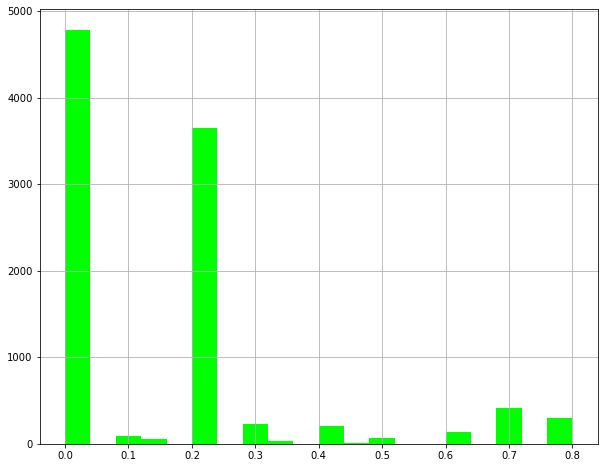

In [26]:
plt.figure(figsize=(10,8))
df['Discount'].hist(bins=20,color='lime')
plt.show()

##  Evaluating the Correlation 

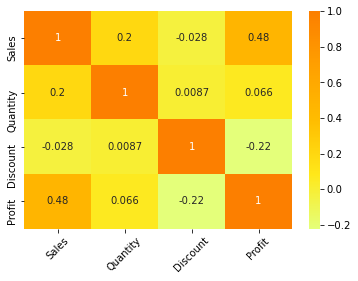

In [27]:
sns.heatmap(df.corr(),cmap='Wistia',annot=True)
plt.xticks(rotation=45)
plt.show()

#### From Above Heatmap

 - Sales and Profit are Moderately Correlated
 - Discount and Profit are Negatively Correlated
 - Quantity and Profit are Less Correlated

<Figure size 720x1152 with 0 Axes>

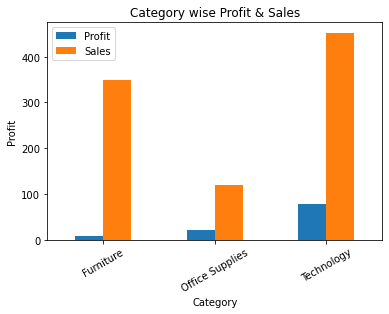

In [33]:
plt.figure(figsize=(10,16))
df.groupby("Category")["Profit","Sales"].mean().plot.bar()
plt.ylabel("Profit")
plt.title("Category wise Profit & Sales")
plt.xticks(rotation=30)
plt.legend()
plt.show()

 - We observe that there is significantly high profits in the 'Technology' category and lesser profit in 'Furtniture' category.

<Figure size 720x1152 with 0 Axes>

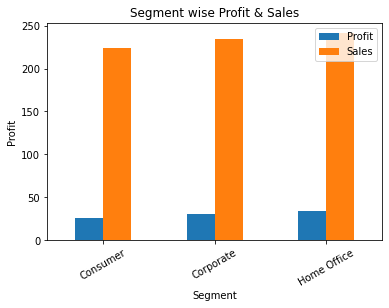

In [34]:
plt.figure(figsize=(10,16))
df.groupby("Segment")["Profit","Sales"].mean().plot.bar()
plt.ylabel("Profit")
plt.title("Segment wise Profit & Sales")
plt.xticks(rotation=30)
plt.legend()
plt.show()

<Figure size 720x1152 with 0 Axes>

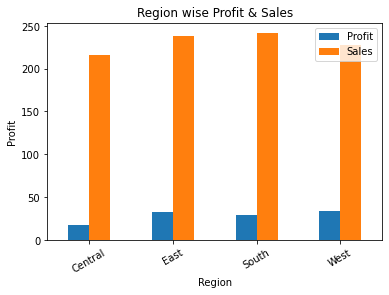

In [35]:
plt.figure(figsize=(10,16))
df.groupby("Region")["Profit","Sales"].mean().plot.bar()
plt.ylabel("Profit")
plt.title("Region wise Profit & Sales")
plt.xticks(rotation=30)
plt.legend()
plt.show()

<Figure size 720x1152 with 0 Axes>

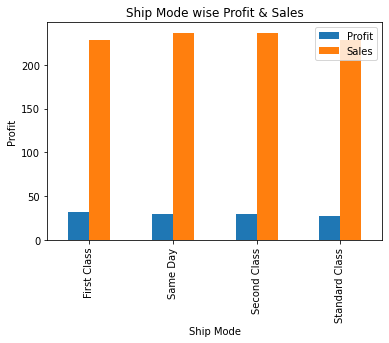

In [32]:
plt.figure(figsize=(10,16))
df.groupby("Ship Mode")["Profit","Sales"].mean().plot.bar()
plt.ylabel("Profit")
plt.title("Ship Mode wise Profit & Sales")
plt.xticks(rotation=30)
plt.legend()
plt.show()

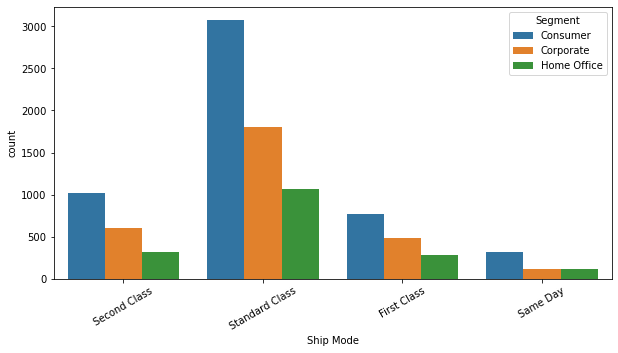

In [39]:
plt.figure(figsize=(10,5))
sns.countplot("Ship Mode", hue="Segment", data=df)
plt.xticks(rotation=30)
plt.show()

 -  As we can see above Standard class ship mode is dominating in terms of count and within each category Consumer segment is dominating with respect to count.

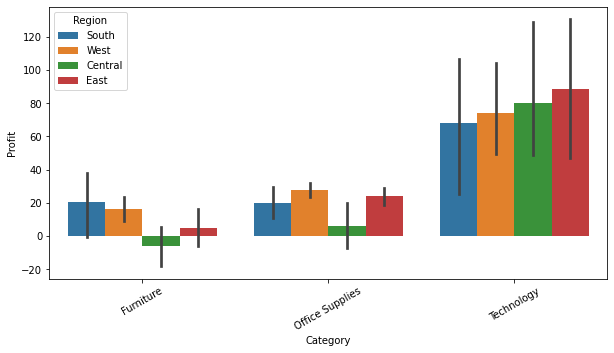

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x="Category",y="Profit",data=df,hue="Region")
plt.xticks(rotation=30)
plt.show()

 - we observe that Selling Furtinure in Central region is not profitable.

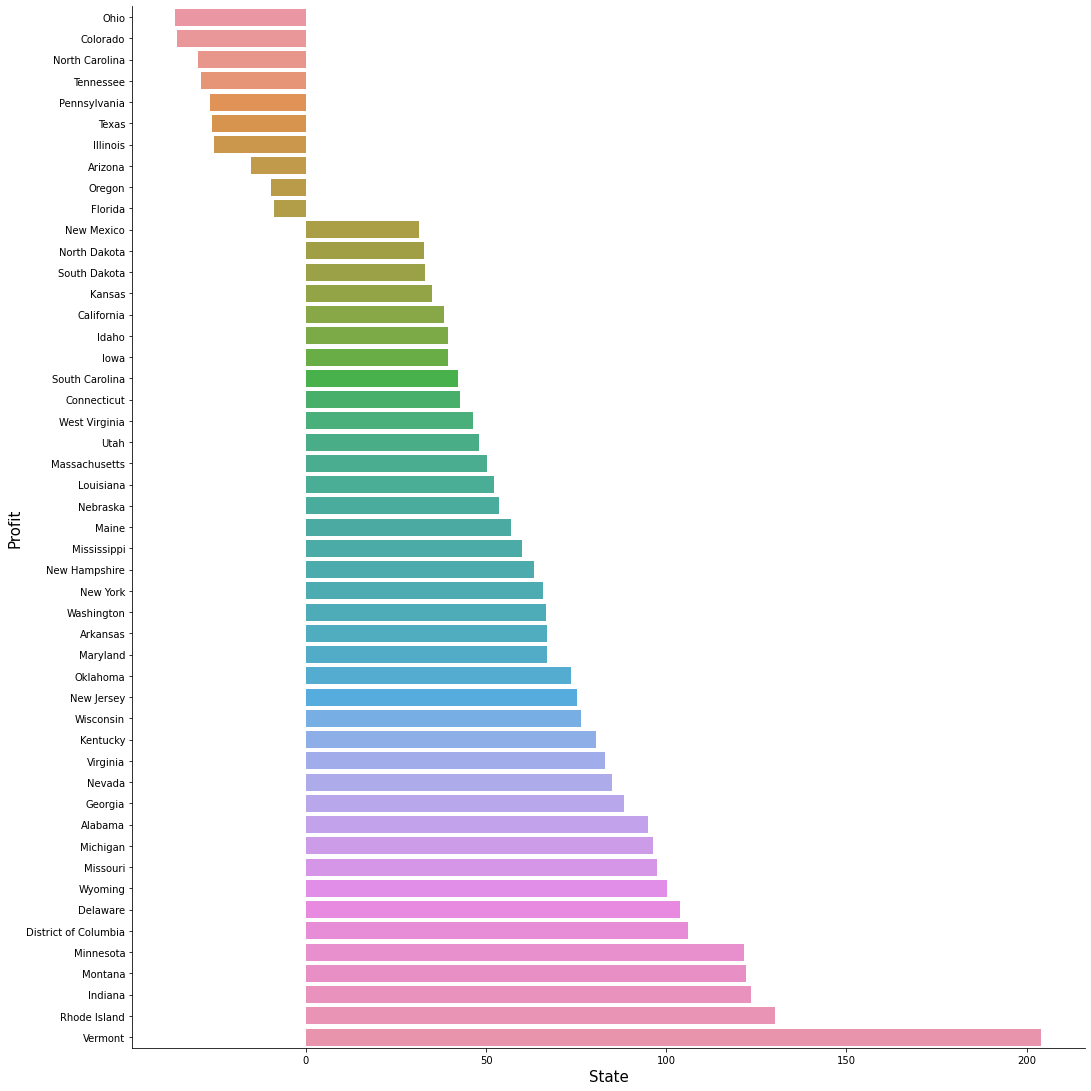

In [58]:
order = df.groupby(["State"])["Profit"].mean().sort_values().index
sns.catplot(y="State",x="Profit",data=df,kind='bar',height=15,order=order,ci=None)
plt.xlabel("State",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

 - We observe  that states like Ohio, North Carolina, Illinois yeild average loss.

Text(0, 0.5, 'Profit')

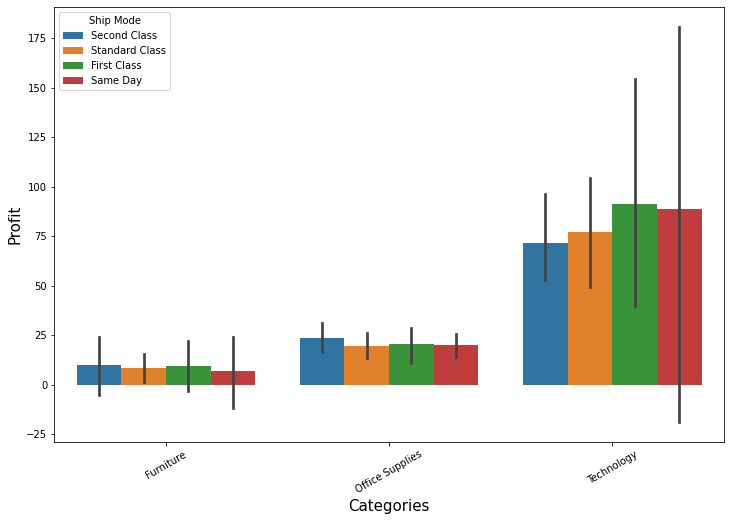

In [53]:
plt.figure(figsize=[12,8])
sns.barplot(x="Category", y="Profit",hue="Ship Mode", data=df)
plt.xticks(rotation=30)
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Profit",fontsize=15)#palette="Wistia"

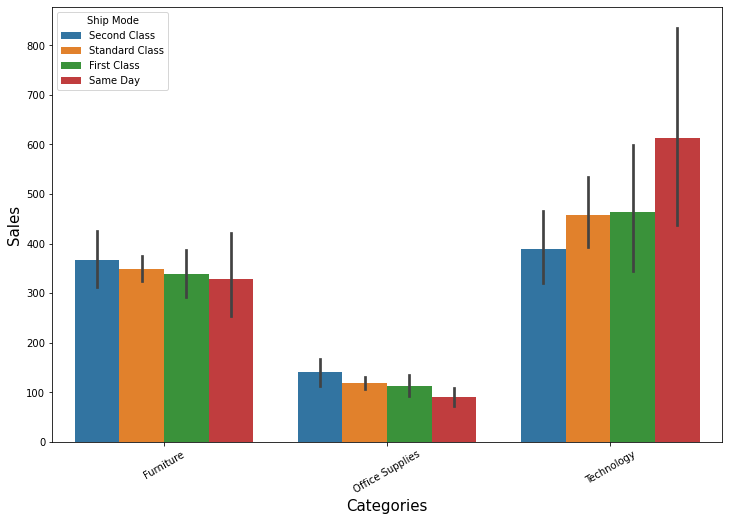

In [52]:
plt.figure(figsize=[12,8])
sns.barplot(x="Category", y="Sales",hue="Ship Mode", data=df)
plt.xticks(rotation=30)
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

## Conclusion:

 - We find most of the customers in California, New York and Texas. Hence these states can be generate more profit.
 - More profit is generated with the sales of Technology goods, hence Sales can be broadened on for this category. On the other hand, furniture sales have not generated significant profits.
 - Selling Furtinure in Central region is loss-making.
 - Selling Furtinure in Eastern region is least profitable among all other regions and categories.
 - Profits among different segment do not vary much.

##               ------------------------- Thank You  -----------------------------------